In [32]:
from matplotlib import rcParams
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
from IPython.display import display

In [2]:
# NB! You need to download the data from https://www.kaggle.com/milesh1/35-million-chess-games
# and rename it to "games_original" before going forward. This is because github does not let us add 2.5GB files to the repo.

In [3]:
# Deletes the first 5 rows from .txt file because they contain useless information(just some introductory text).
# Then save it to a new file.

file = open('games_original.txt', "r")
lines = file.readlines()
file.close()

for i in range(5):
    del lines[0]

new_file = open("games.txt", "w+")

for line in lines:
    new_file.write(line)
new_file.close()

In [4]:
# DO NOT WORRY THIS STEP TAKES A LOT OF TIME BECAUSE OF THE FILE SIZE(2.5GB).
# Reading in the data and converting it to a Pandas dataframe.

raw_data = pd.read_csv('games.txt', delimiter=" ### ", header=None)

column_names = ["#", "date", "result", "welo", "belo", "len", "date_c", "resu_c", "welo_c", "belo_c", "edate_c", "setup", "fen", "resu2_c", "oyrange", "bad_len", "DELETE THIS"]
data = pd.DataFrame(raw_data[0].str.split(" ").to_list(), columns=column_names)

data.drop(['DELETE THIS'], axis=1, inplace=True)

data = pd.concat([data, raw_data[1]], axis=1)
data = data.rename(columns = {1: 'moves'}, inplace = False)
data['len'] = data['len'].astype(int)
data.head(5)

<ipython-input-4-655030599db5>:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  raw_data = pd.read_csv('games.txt', delimiter=" ### ", header=None)


,#,date,result,welo,belo,len,date_c,resu_c,welo_c,belo_c,edate_c,setup,fen,resu2_c,oyrange,bad_len,moves
0,1,2000.03.14,1-0,2851,None,67,date_false,result_false,welo_false,belo_true,edate_true,setup_false,fen_false,result2_false,oyrange_false,blen_false,W1.d4 B1.d5 W2.c4 B2.e6 W3.Nc3 B3.Nf6 W4.cxd5 ...
1,2,2000.03.14,1-0,2851,None,53,date_false,result_false,welo_false,belo_true,edate_true,setup_false,fen_false,result2_false,oyrange_false,blen_false,W1.e4 B1.d5 W2.exd5 B2.Qxd5 W3.Nc3 B3.Qa5 W4.d...
2,3,1999.11.20,1-0,2851,None,57,date_false,result_false,welo_false,belo_true,edate_false,setup_false,fen_false,result2_false,oyrange_false,blen_false,W1.e4 B1.e5 W2.Nf3 B2.Nc6 W3.Bc4 B3.Bc5 W4.c3 ...
3,4,1999.11.20,1-0,2851,None,49,date_false,result_false,welo_false,belo_true,edate_false,setup_false,fen_false,result2_false,oyrange_false,blen_false,W1.e4 B1.d5 W2.exd5 B2.Qxd5 W3.Nc3 B3.Qa5 W4.d...
4,5,2000.02.20,1/2-1/2,2851,2633,97,date_false,result_false,welo_false,belo_false,edate_false,setup_false,fen_false,result2_false,oyrange_false,blen_false,W1.e4 B1.e5 W2.Nf3 B2.Nc6 W3.Bb5 B3.a6 W4.Ba4 ...


In [5]:
# Data cleaning.
# Removing columns and rows that are useless to use.
data.drop(data[data["setup"] != "setup_false"].index, inplace=True)
data.drop(['resu_c', 'welo_c', 'belo_c', 'setup', 'fen', 'oyrange', 'bad_len', 'resu2_c', 'edate_c', 'date_c'], axis=1, inplace=True)
data.drop(data[data.result == "*"].index, inplace=True) # Remove all rows where the result is "*", meaning that the result is corrupted or missing.
data.drop(data[data.len < 4].index, inplace=True) # Removing all rows where the len is smaller than 4.

# Changing datatypes
data.welo = data.welo.replace("None", np.nan)
data.belo = data.belo.replace("None", np.nan)
data.welo = data.welo.astype("float")
data.belo = data.belo.astype("float")

data.head()

,#,date,result,welo,belo,len,moves
0,1,2000.03.14,1-0,2851.0,NaN,67,W1.d4 B1.d5 W2.c4 B2.e6 W3.Nc3 B3.Nf6 W4.cxd5 ...
1,2,2000.03.14,1-0,2851.0,NaN,53,W1.e4 B1.d5 W2.exd5 B2.Qxd5 W3.Nc3 B3.Qa5 W4.d...
2,3,1999.11.20,1-0,2851.0,NaN,57,W1.e4 B1.e5 W2.Nf3 B2.Nc6 W3.Bc4 B3.Bc5 W4.c3 ...
3,4,1999.11.20,1-0,2851.0,NaN,49,W1.e4 B1.d5 W2.exd5 B2.Qxd5 W3.Nc3 B3.Qa5 W4.d...
4,5,2000.02.20,1/2-1/2,2851.0,2633.0,97,W1.e4 B1.e5 W2.Nf3 B2.Nc6 W3.Bb5 B3.a6 W4.Ba4 ...


In [6]:
print("White winrate: " + str(round(len(data[data["result"] == "1-0"]) / len(data) * 100, 2)) + "%")
print("Black winrate: " + str(round(len(data[data["result"] == "0-1"]) / len(data) * 100, 2)) + "%")
print("Draw: " + str(round(len(data[data["result"] == "1/2-1/2"]) / len(data) * 100, 2)) + "%")

White winrate: 38.62%
Black winrate: 31.08%
Draw: 30.3%


In [7]:
# Found it out just in case some ideas pop up and there is enough time left to implement them

rcParams["figure.figsize"] = 12, 12

elo_ranges = [[0, 500], [501, 1000], [1001, 1500], [1501, 2000], [2001, 2500], [2501, 3000], ["None", "None"]]

# White elo ranges on x
# Black elo ranges on y
x_columns = [str(x[0]) + "-" + str(x[1]) for x in elo_ranges]
y_columns = [str(x[0]) + "-" + str(x[1]) for x in elo_ranges]
elo_clusters = pd.DataFrame(columns=x_columns, index=y_columns)
elo_clusters["0-500"]["501-1000"] = 1
elo_clusters
print(elo_clusters.columns)

dataset = data

for white_elo_range in elo_ranges:
    for black_elo_range in elo_ranges:
        white_elo = str(white_elo_range[0]) + "-" + str(white_elo_range[1])
        black_elo = str(black_elo_range[0]) + "-" + str(black_elo_range[1])
        min_elo_w = white_elo_range[0]
        max_elo_w = white_elo_range[1]
        min_elo_b = black_elo_range[0]
        max_elo_b = black_elo_range[1]
        if white_elo == "None-None":
            white_count = dataset.welo.isnull()
        else:
            white_count = (dataset["welo"] >= min_elo_w) & (dataset["welo"] < max_elo_w)
        
        if black_elo == "None-None":
            black_count = dataset.belo.isnull()
        else:
            black_count = (dataset["belo"] < max_elo_b) & (dataset["belo"] >= min_elo_b)
           
        count = len(dataset[white_count & black_count])
        
        elo_clusters[white_elo][black_elo] = count

elo_clusters

Index(['0-500', '501-1000', '1001-1500', '1501-2000', '2001-2500', '2501-3000',
       'None-None'],
      dtype='object')


,0-500,501-1000,1001-1500,1501-2000,2001-2500,2501-3000,None-None
0-500,106,143,163,92,66,1,126
501-1000,144,1855,3232,664,48,1,1661
1001-1500,133,3131,21205,20151,1664,65,3890
1501-2000,109,621,19433,118932,71880,907,19325
2001-2500,62,53,1588,69140,1185127,135548,266228
2501-3000,2,0,39,711,131004,118458,8468
None-None,135,1694,4012,19743,273912,10418,965401


In [8]:
# Making a copy of the original dataset to find the most popular openings in winning games
data_copy = data.copy(deep=True)
data_copy.drop(['date', 'welo', 'belo', 'len'], axis=1, inplace=True) # Removed columns that are useless in finding most popular openings.
data_copy.drop(data_copy[data_copy.result == "1/2-1/2"].index, inplace=True) # Remove all rows where the game ended in a draw.
data_copy.head()

,#,result,moves
0,1,1-0,W1.d4 B1.d5 W2.c4 B2.e6 W3.Nc3 B3.Nf6 W4.cxd5 ...
1,2,1-0,W1.e4 B1.d5 W2.exd5 B2.Qxd5 W3.Nc3 B3.Qa5 W4.d...
2,3,1-0,W1.e4 B1.e5 W2.Nf3 B2.Nc6 W3.Bc4 B3.Bc5 W4.c3 ...
3,4,1-0,W1.e4 B1.d5 W2.exd5 B2.Qxd5 W3.Nc3 B3.Qa5 W4.d...
6,7,1-0,W1.e4 B1.c5 W2.Nf3 B2.Nc6 W3.Bb5 B3.g6 W4.Bxc6...


In [9]:
# This step also takes a long time because it has to iterate through every row.
# Finding the moves that the winning player made in each played game.
# Also we only take the first 3 moves and not every move because 
winnersMoves = []
for index, row in data_copy.iterrows():
    if (row['result'] == "1-0"): # If the white player won.
        movesWithQueue = row['moves'].split(" ")
        moves = ""
        i = 0
        for moveWithQueue in movesWithQueue:
            if (i == 3):
                break
            if (moveWithQueue[0] == "W"):
                move = moveWithQueue.split(".")
                moves += " "
                moves += move[1]
                i += 1
        winnersMoves.append(moves)
    else: # If the black player won.
        movesWithQueue = row['moves'].split(" ")
        moves = ""
        j = 0
        for moveWithQueue in movesWithQueue:
            if (j == 3):
                break
            if (moveWithQueue[0] == "B"):
                move = moveWithQueue.split(".")
                moves += " "
                moves += move[1]
                j += 1
                
        winnersMoves.append(moves)

winnerMovesDataFrame = pd.DataFrame(data=winnersMoves, columns = ['Moves'])
winnerMovesDataFrame.head()

,Moves
0,d4 c4 Nc3
1,e4 exd5 Nc3
2,e4 Nf3 Bc4
3,e4 exd5 Nc3
4,e4 Nf3 Bb5


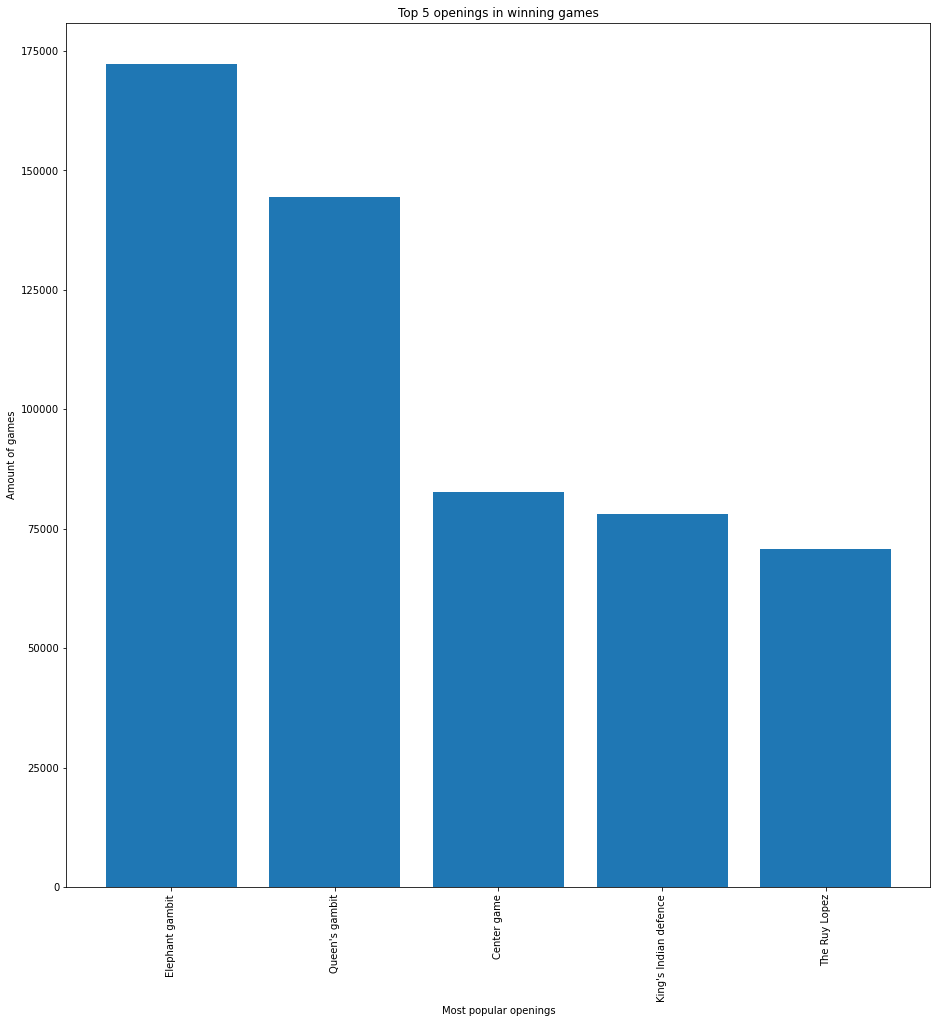

In [10]:
weights = winnerMovesDataFrame["Moves"].value_counts()
values = list()
counter = 0
for x in weights:
    if (counter == 5):
        break
    values.append(x)
    counter += 1
    
keys = list()
counter = 0
for key in weights.keys():
    if (counter == 5):
        break
    keys.append(key)
    counter += 1
keys[0] = "Elephant gambit"
keys[1] = "Queen's gambit"
keys[2] = "Center game"
keys[3] = "King's Indian defence"
keys[4] = "The Ruy Lopez"
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(keys,values)
plt.xticks(rotation='vertical')
plt.xlabel("Most popular openings")
plt.ylabel("Amount of games")
plt.title('Top 5 openings in winning games')
plt.show()

1. Elephant Gambit


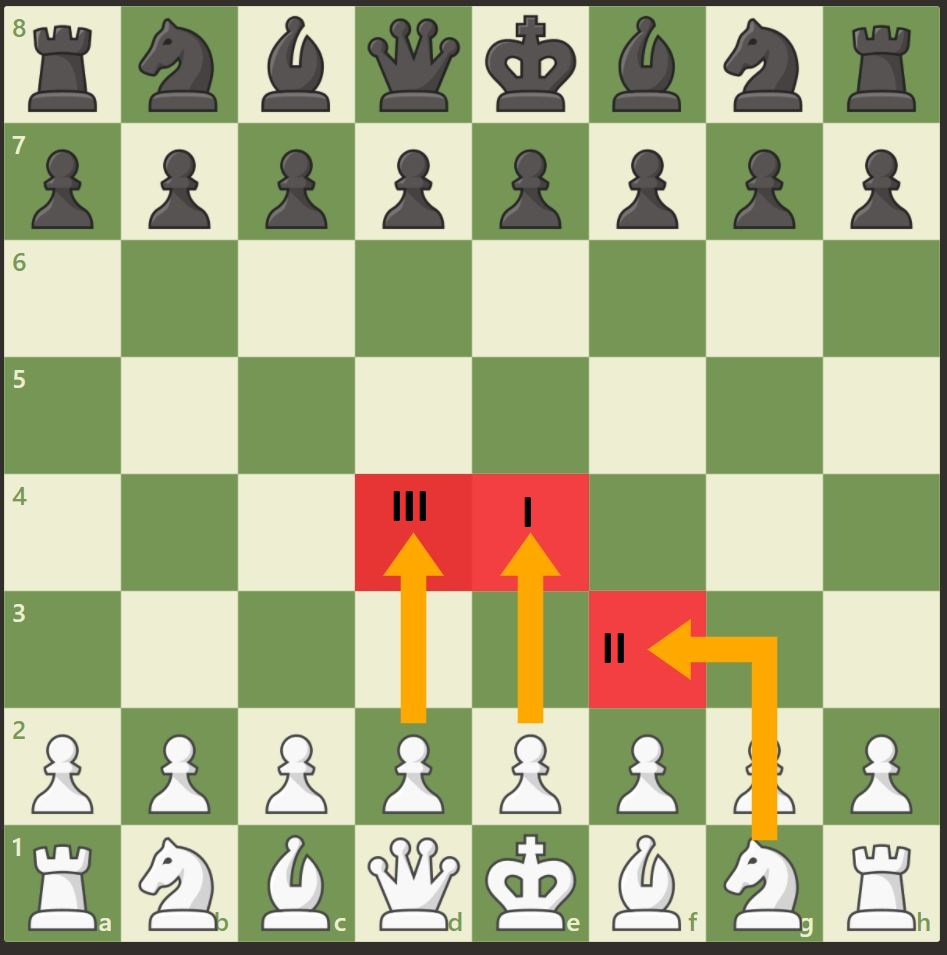

2. Queen's Gambit


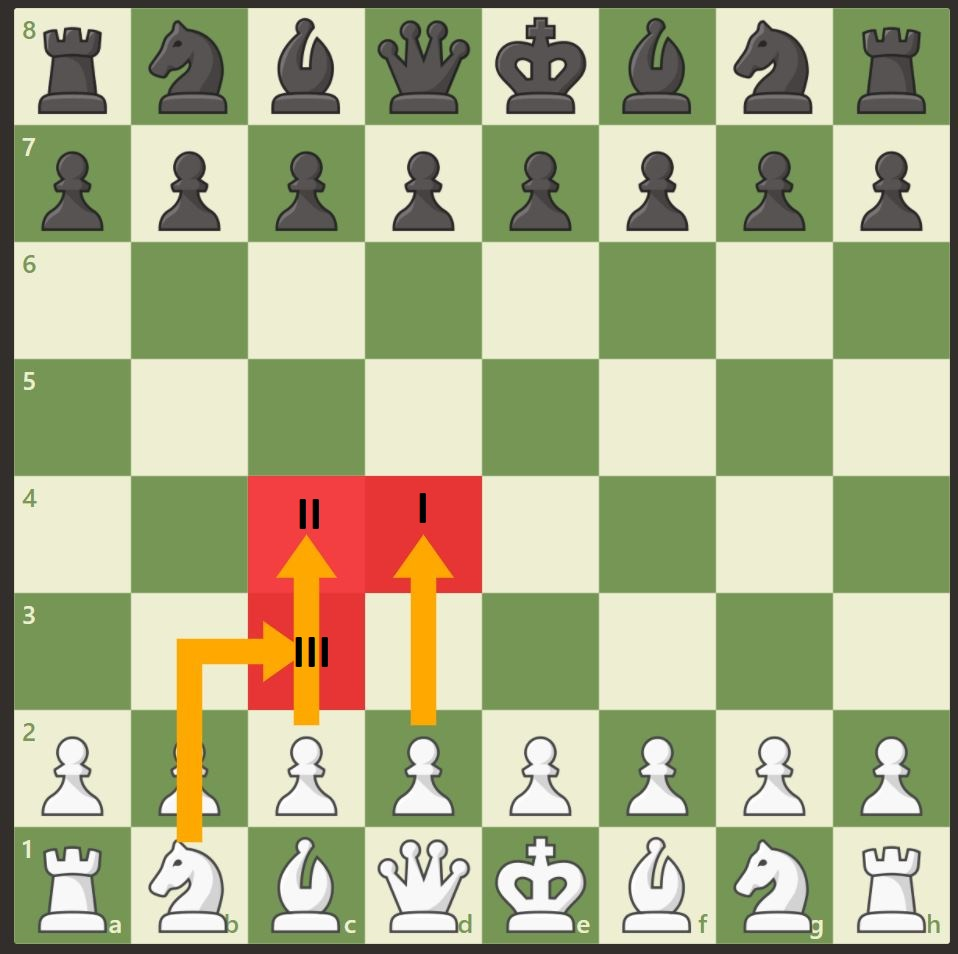

3. Center Game


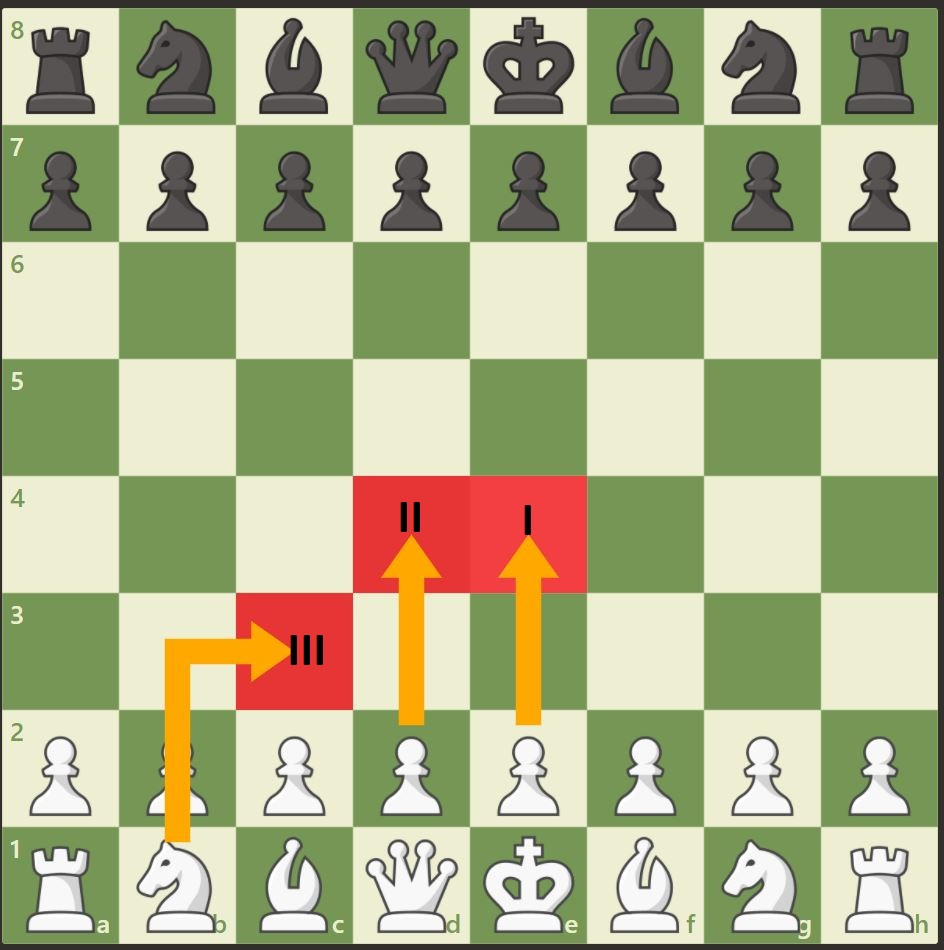

4. King's Indian Defence


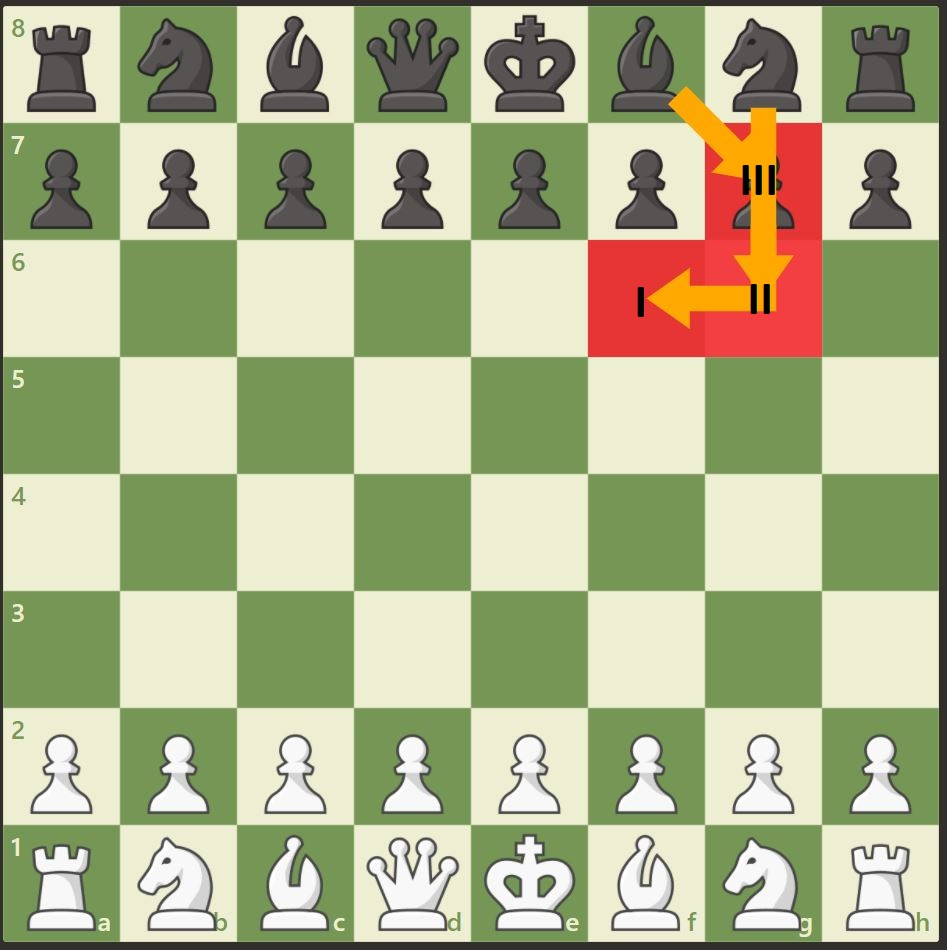

5. The Ruy Lopez


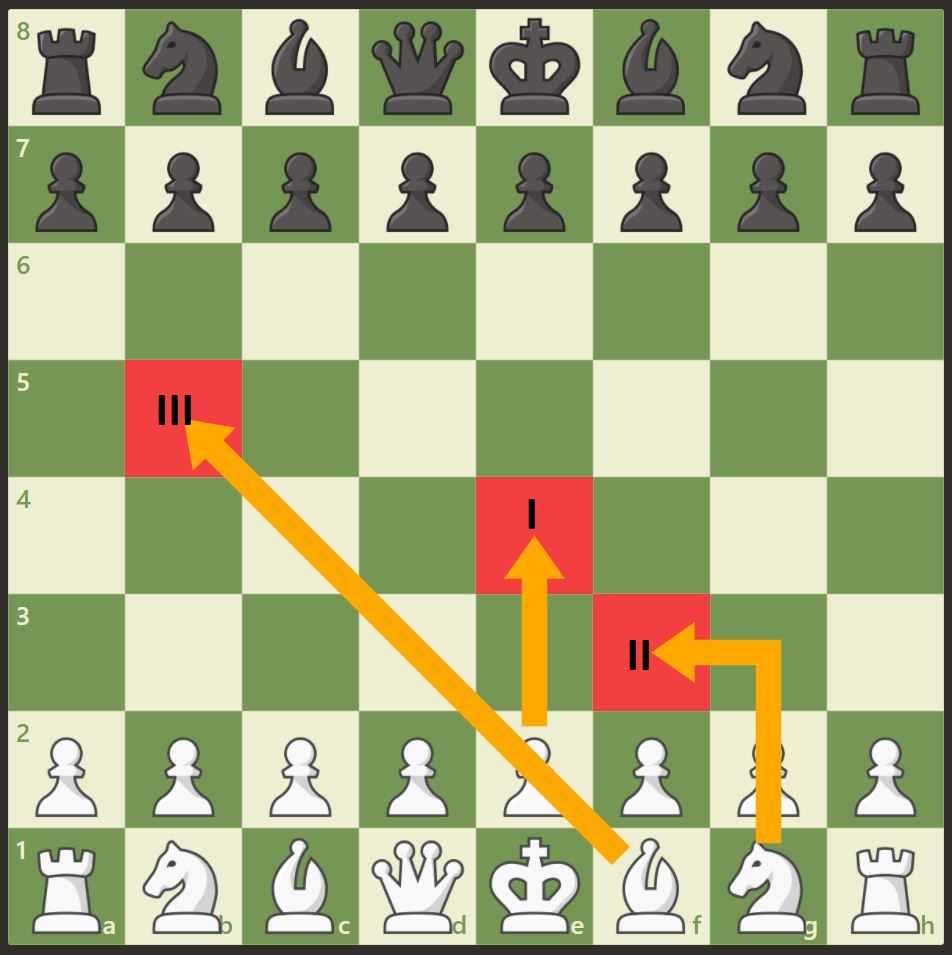

In [36]:
#Visualization of the openings (made with chess.com)

elephant = Image("images/Elephant_gambit.jpg", width=200)
queen = Image("images/Queens_gambit.jpg", width=200)
center = Image("images/Center_game.jpg", width=200)
indian = Image("images/Kings_Indian_Defence.jpg", width=200)
lopez = Image("images/The_Ruy_Lopez.jpg", width=200)

print("1. Elephant Gambit")
display(elephant)
print("2. Queen's Gambit")
display(queen)
print("3. Center Game")
display(center)
print("4. King's Indian Defence")
display(indian)
print("5. The Ruy Lopez")
display(lopez)


In [11]:
# Data preparation for finding winrates of the first moves.
moves = data["moves"]
first_move_data = pd.DataFrame({
    "result": data["result"],
    "welo": data["welo"],
    "belo": data["belo"],
    "w_move": [move.split(" ")[0].split(".")[1] for move in moves],
    "b_move": [move.split(" ")[1].split(".")[1] for move in moves]
})

first_move_data

,result,welo,belo,w_move,b_move
0,1-0,2851.0,NaN,d4,d5
1,1-0,2851.0,NaN,e4,d5
2,1-0,2851.0,NaN,e4,e5
3,1-0,2851.0,NaN,e4,d5
4,1/2-1/2,2851.0,2633.0,e4,e5
...,...,...,...,...,...
3561465,1-0,NaN,NaN,e4,e6
3561466,1/2-1/2,NaN,NaN,d4,Nf6
3561467,1-0,NaN,NaN,c4,Nf6
3561468,1-0,NaN,NaN,g3,d5


0-500
501-1000
1001-1500
1501-2000
2001-2500
2501-3000


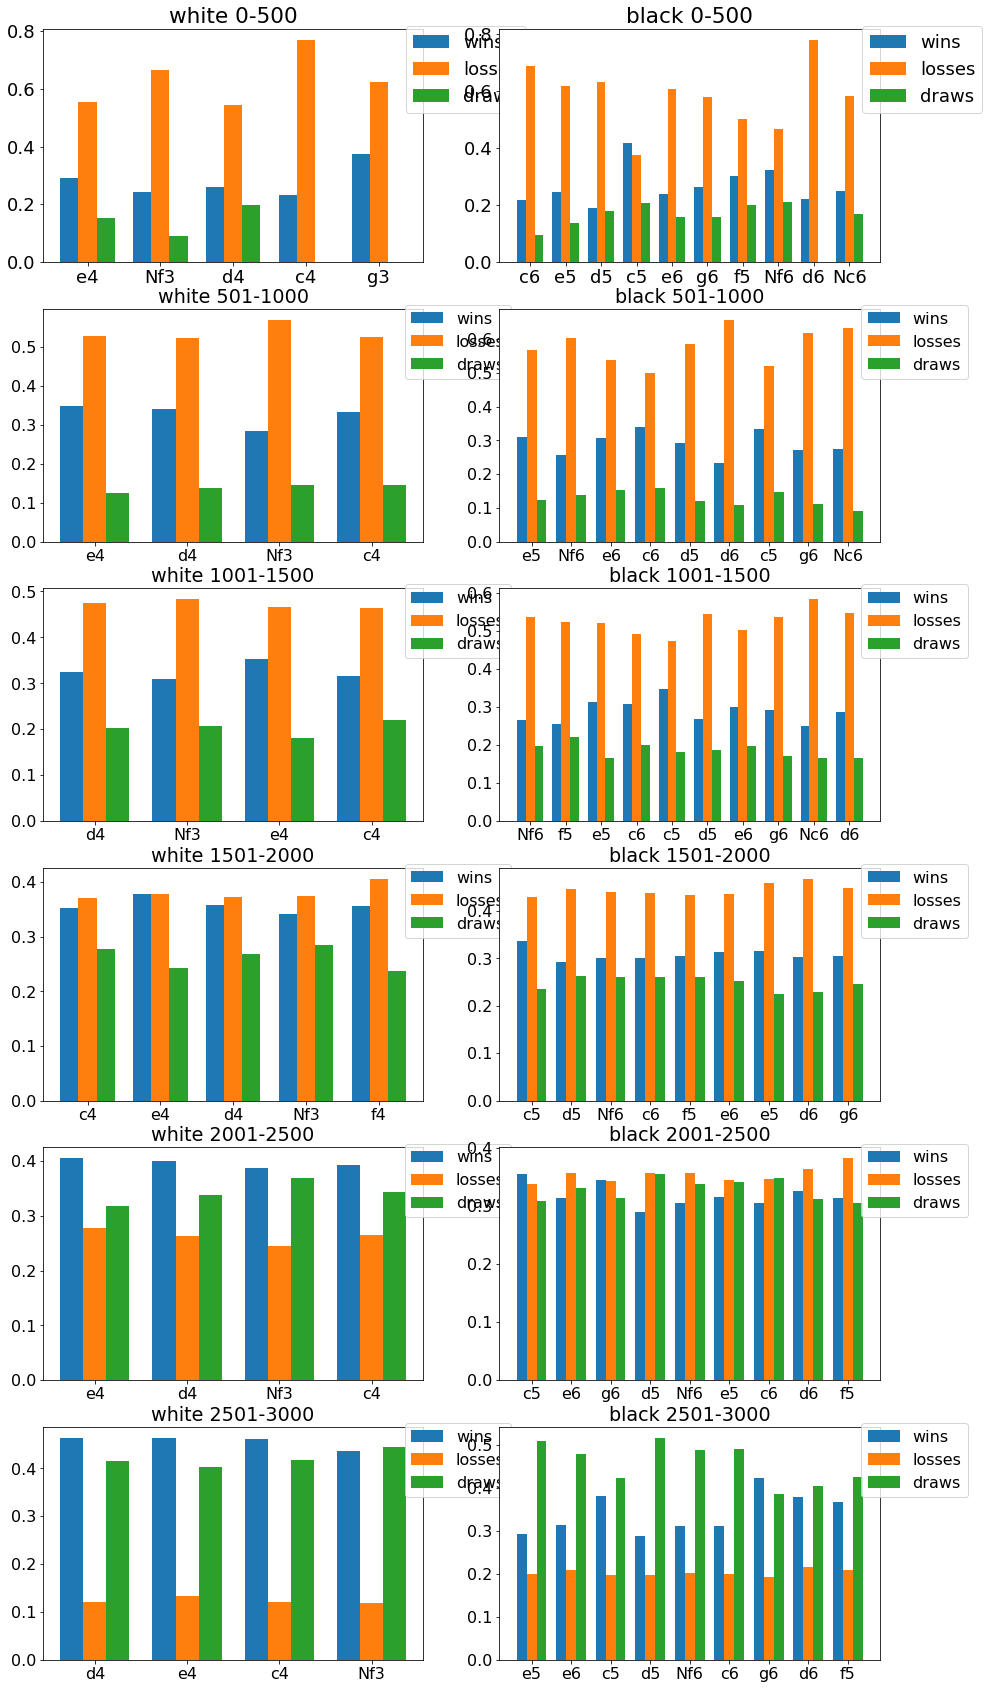

In [42]:
# Finds winning rates for the first move for black and white.

rcParams["figure.figsize"] = 15, 30
subplot_index = 1
elo_ranges = [[0, 500], [501, 1000], [1001, 1500], [1501, 2000], [2001, 2500], [2501, 3000]]

dataset = first_move_data

for elo_range in elo_ranges:
    min_elo = elo_range[0]
    max_elo = elo_range[1]
    elo = str(min_elo) + "-" + str(max_elo)
    print(elo) # Just to indicate how far the process is.
    
    white_games = dataset[(dataset["welo"] >= min_elo) & (dataset["welo"] < max_elo)]
    black_games = dataset[(dataset["belo"] >= min_elo) & (dataset["belo"] < max_elo)]
    
    white_moves = white_games["w_move"].unique()
    black_moves = black_games["b_move"].unique()

    white_winrates = pd.DataFrame({"wins": [len(white_games[(white_games["w_move"]==move) & (white_games["result"]=="1-0")]) for move in white_moves],
                             "losses": [len(white_games[(white_games["w_move"]==move) & (white_games["result"]=="0-1")]) for move in white_moves],
                             "draws": [len(white_games[(white_games["w_move"]==move) & (white_games["result"]=="1/2-1/2")]) for move in white_moves],
                                  "total_games": [len(white_games[(white_games["w_move"]==move)])for move in white_moves]},
                            index=white_moves)
    
    black_winrates = pd.DataFrame({"wins": [len(black_games[(black_games["b_move"]==move) & (black_games["result"]=="0-1")])for move in black_moves],
                             "losses": [len(black_games[(black_games["b_move"]==move) & (black_games["result"]=="1-0")])for move in black_moves],
                             "draws": [len(black_games[(black_games["b_move"]==move) & (black_games["result"]=="1/2-1/2")])for move in black_moves],
                                  "total_games": [len(black_games[(black_games["b_move"]==move)])for move in black_moves]},
                            index=black_moves)
    
    # Filters out moves which have been played less than 1% of times.
    white_winrates = white_winrates[white_winrates["total_games"] / sum(white_winrates["total_games"]) * 100 >= 1]
    black_winrates = black_winrates[black_winrates["total_games"] / sum(black_winrates["total_games"]) * 100 >= 1]
    
    # Plot for white
    width = 0.25
    bars1 = np.arange(len(white_winrates))
    bars2 = [x + width for x in bars1]
    bars3 = [x + width for x in bars2]
    
    wins = [row.wins / row.total_games for idx,row in white_winrates.iterrows()]
    losses = [row.losses / row.total_games for idx,row in white_winrates.iterrows()]
    draws = [row.draws / row.total_games for idx,row in white_winrates.iterrows()]
    
    # Sketchy but maybe works
    if not wins:
        wins = [0]
    if not losses:
        losses = [0]
    if not draws:
        draws = [0]
        
    plt.subplot(6, 2, subplot_index)
    plt.bar(bars1, wins, width=width, label="wins")
    plt.bar(bars2, losses, width=width, label="losses")
    plt.bar(bars3, draws, width=width, label="draws")
    plt.title("white " + elo)
    plt.xticks([x + width for x in range(len(white_winrates))], white_winrates.index)
    subplot_index += 1
    plt.legend(bbox_to_anchor=(0.93, 1.05), loc="upper left")
    
    # Plot for black
    width = 0.25
    bars1 = np.arange(len(black_winrates))
    bars2 = [x + width for x in bars1]
    bars3 = [x + width for x in bars2]

    wins = [row.wins / row.total_games for idx,row in black_winrates.iterrows()]
    losses = [row.losses / row.total_games for idx,row in black_winrates.iterrows()]
    draws = [row.draws / row.total_games for idx,row in black_winrates.iterrows()]
    
    # To avoid errors.
    if not wins:
        wins = [0]
    if not losses:
        losses = [0]
    if not draws:
        draws = [0]
        
    plt.subplot(6, 2, subplot_index)
    plt.bar(bars1, wins, width=width, label="wins")
    plt.bar(bars2, losses, width=width, label="losses")
    plt.bar(bars3, draws, width=width, label="draws")
    plt.title("black " + elo)
    plt.xticks([x + width for x in range(len(black_winrates))], black_winrates.index)
    subplot_index += 1
    plt.legend(bbox_to_anchor=(0.93, 1.05), loc="upper left")
    rcParams.update({'font.size': 16})

In [13]:
elo_ranges = [[0, 500], [501, 1000], [1001, 1500], [1501, 2000], [2001, 2500], [2501, 3000]]
for elo in elo_ranges:
    elo_name = str(elo[0]) + "-" + str(elo[1])
    games_count = len(data[(data.welo >= elo[0]) & (data.welo < elo[1])])
    percentage = round(games_count / len(data) * 100, 2)
    print("White games in {} elo range: {}%".format(elo_name, str(percentage)))

for elo in elo_ranges:
    elo_name = str(elo[0]) + "-" + str(elo[1])
    games_count = len(data[(data.belo >= elo[0]) & (data.belo < elo[1])])
    percentage = round(games_count / len(data) * 100, 2)
    print("Black games in {} elo range: {}%".format(elo_name, str(percentage)))

White games in 0-500 elo range: 0.02%
White games in 501-1000 elo range: 0.21%
White games in 1001-1500 elo range: 1.42%
White games in 1501-2000 elo range: 6.59%
White games in 2001-2500 elo range: 47.62%
White games in 2501-3000 elo range: 7.63%
Black games in 0-500 elo range: 0.02%
Black games in 501-1000 elo range: 0.22%
Black games in 1001-1500 elo range: 1.44%
Black games in 1501-2000 elo range: 6.64%
Black games in 2001-2500 elo range: 47.45%
Black games in 2501-3000 elo range: 7.44%


In [14]:
# Data preparation for finding checks percetange.
moves = data["moves"]
white_moves = []
black_moves = []

for move_seq in moves:
    white_check_counter = 0
    black_check_counter = 0
    for move in move_seq.split(" "):
        if "W" in move and "+" in move:
            white_check_counter += 1
        if "B" in move and "+" in move:
            black_check_counter += 1
    white_moves.append(white_check_counter)
    black_moves.append(black_check_counter)

checks_data = pd.DataFrame({
    "welo": data["welo"],
    "belo": data["belo"],
    "w_checks": white_moves,
    "b_checks": black_moves
})

checks_data

,welo,belo,w_checks,b_checks
0,2851.0,NaN,3,1
1,2851.0,NaN,0,1
2,2851.0,NaN,1,0
3,2851.0,NaN,0,0
4,2851.0,2633.0,0,5
...,...,...,...,...
3561465,NaN,NaN,2,1
3561466,NaN,NaN,2,6
3561467,NaN,NaN,0,1
3561468,NaN,NaN,2,0


0-500
501-1000
1001-1500
1501-2000
2001-2500
2501-3000


<ipython-input-15-c757c895bf60>:50: RuntimeWarning: Second argument 'white' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
  plt.plot("elo", "white", data = white_df)
<ipython-input-15-c757c895bf60>:51: RuntimeWarning: Second argument 'black' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
  plt.plot("elo", "black", data = black_df)


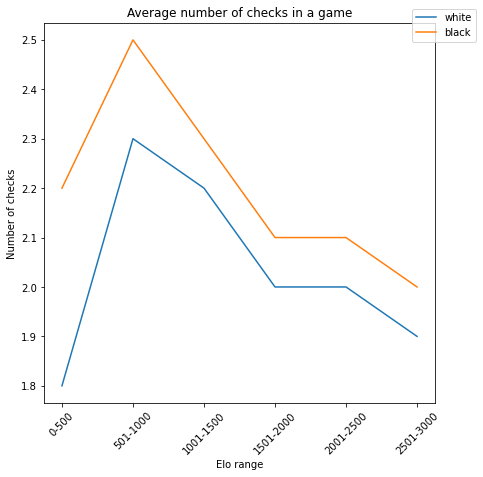

In [15]:
# Finding the average number of checks made in a game within different elo ranges.
elo_ranges = [[0, 500], [501, 1000], [1001, 1500], [1501, 2000], [2001, 2500], [2501, 3000]]
white_data = []
black_data = []

dataset = checks_data

for elo_range in elo_ranges:
    min_elo = elo_range[0]
    max_elo = elo_range[1]
    elo = str(min_elo) + "-" + str(max_elo)
    print(elo) # Just to indicate how far the process is.
        
    white_games = dataset[(dataset["welo"] >= min_elo) & (dataset["welo"] < max_elo)]
    black_games = dataset[(dataset["belo"] >= min_elo) & (dataset["belo"] < max_elo)]
    
    white_checks = sum(white_games.w_checks)
    black_checks = sum(black_games.b_checks)
    
    if white_checks:
        white_avg = round(white_checks / len(white_games), 1)
    else:
        white_avg = 0
        
    if black_checks:
        black_avg = round(black_checks / len(black_games), 1)
    else:
        black_avg = 0
    
    white_data.append(white_avg)
    black_data.append(black_avg)
    

# Plotting the data
white_df = pd.DataFrame({
    "elo": [str(elo[0])+"-"+str(elo[1]) for elo in elo_ranges],
    "white": white_data
})

black_df = pd.DataFrame({
    "elo": [str(elo[0])+"-"+str(elo[1]) for elo in elo_ranges],
    "black": black_data
})

rcParams["figure.figsize"] = 7, 7
plt.xticks(rotation=45)
plt.title("Average number of checks in a game")
plt.xlabel("Elo range")
plt.ylabel("Number of checks")
plt.plot("elo", "white", data = white_df)
plt.plot("elo", "black", data = black_df)
plt.legend(bbox_to_anchor=(0.93, 1.05), loc="upper left")